# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


### MY Testing Environments

1) CPU:   Intel Core i7-7700K (4.6Ghz OC)   4 CPU CORES, 8 threads

2) RAM:   16GB DDR4

3) GPU:   nVidia GeForce GTX 970 4GB GGDR5

4) OS:    WINDOWS 10 PRO 64bit

5) nVidia Software:  Nvidia CUDA and cuDNN V 5.1


## Step 0: Load The Data

#### import all necessary libraries in one go

In [1]:
# Imports all libraries required
import os
import cv2
import csv
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from pylab import rcParams
from skimage import transform
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from tensorflow.contrib.layers import flatten
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


#### some unexpected errors are present

In [2]:
# Imports all libraries required
import os
import cv2
import csv
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from pylab import rcParams
from skimage import transform
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from tensorflow.contrib.layers import flatten
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

#### executing the same codes again removes the errors, not sure why!!

#### Loading pickled data as instructed in the TEMPLATE Jupyter Notebook

In [3]:
# Load pickled data

training_file = 'train.p'
validating_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:train = pickle.load(f)
with open(validating_file, mode='rb')  as f:valid = pickle.load(f)  
with open(testing_file, mode='rb')  as f:test = pickle.load(f)
  
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validating examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

#### Display randomly 10 images from the training set.

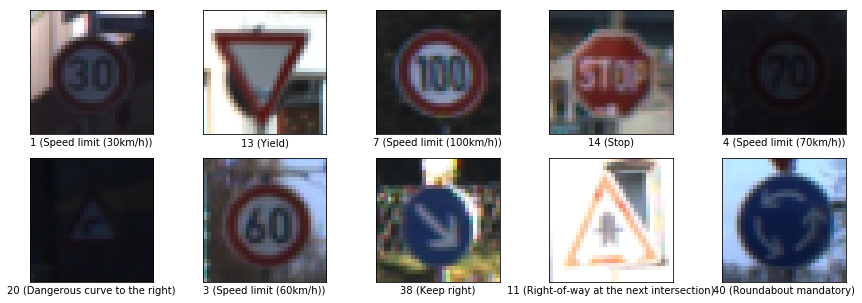

In [5]:
### Data exploration visualization
fig = plt.figure(figsize=(15, 5))

image_seq = np.random.randint(1,len(X_train),10)

# Load image labels from csv
label_csv = csv.reader(open('signnames.csv', 'r'))
label_names = []
for row in label_csv:
    label_names.append(row[1])
label_names.pop(0)

for ind,val in enumerate(image_seq):
    img = fig.add_subplot(2,5,ind+1)
    plt.imshow(X_train[val-1])
    #Add corresponding label
    img.set_xlabel("{0} ({1})".format(y_train[val-1], label_names[y_train[val-1]]))
    #Remove the axis ticks
    img.set_xticks([])
    img.set_yticks([])

plt.show()

#### Create a histogram that depicts the overall dataset distribution for the training set.

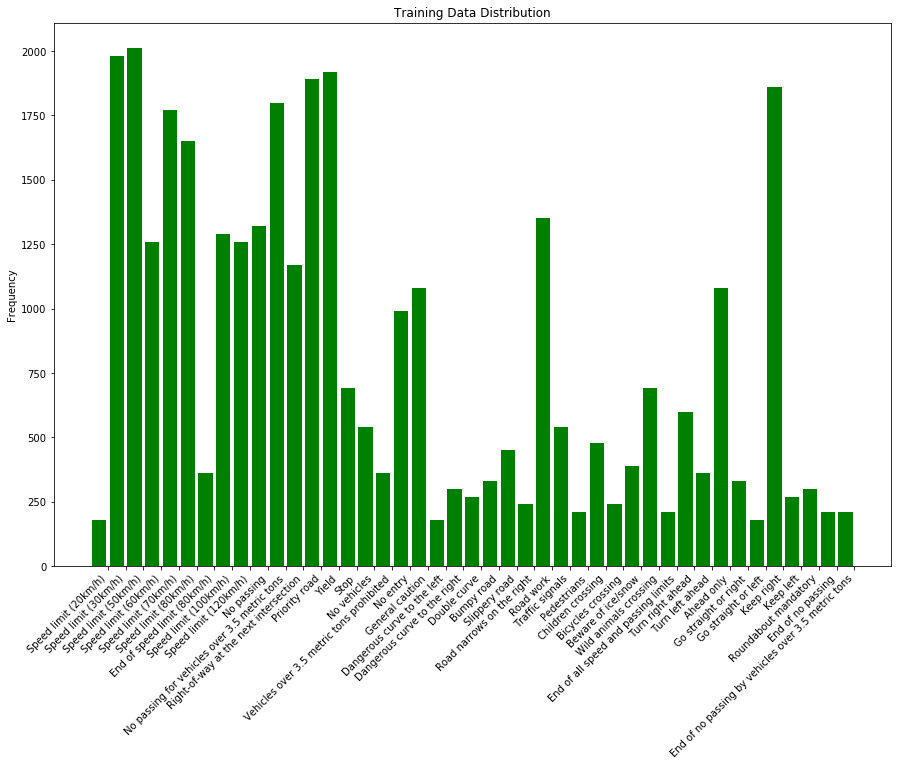

In [6]:
# A= unique   B = counts
A, B = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(15,10))
plt.bar(A, B, color='green')   
label = [label for label in label_names]
plt.xticks(np.arange(0.5,n_classes+0.5), label, rotation=45,ha='right')
plt.ylabel('Frequency')
plt.title('Training Data Distribution')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
def preprocess(X):
       
    # Normalize to range 0-1
    X = (X - X.mean())/(np.max(X) - np.min(X))
    
   # grayscale conversion
    X = 0.114 * X[...,0] + 0.587 * X[...,1] + 0.299 * X[...,2] # BGR->Gray
    return X

In [8]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I encapsulate 2 operations within a single 'preprocess' function here.

The first operation is normalisation using the simple formula  X = (X - X.mean())/(np.max(X) - np.min(X)), the purpose of normalisation is to help the gradient descent optimizer (Adam Optimizer) to converge faster by restricting the  range of feature values.

The 2nd operation is grayscale conversion, which is supposed to be detrimental to the model performance, however, I was at a loss to explain why grayscale conversion turned out to be conducive to the test accuracy at the end. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Since I have 3 separate files for training, validation and testing respectively, it makes sense to avoid using training/testing split function here.  train.p is used for training exclusively, valid.p is earmarked for validation during the training process, while the test.p is strictly reserved for testing purpose once the training is completed.

In [9]:
layer_depth = {
    'layer_1': 12,
    'layer_2': 32,
    'fully_connected_1': 512,
    'fully_connected_2': 256,
    'fully_connected_3': 128,
    'out': n_classes,
}


weights = {
   'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_depth['layer_1']], mean=0, stddev=0.1)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean=0, stddev=0.1)),
    'fully_connected_1': tf.Variable(tf.truncated_normal(
        [5*5*layer_depth['layer_2'], layer_depth['fully_connected_1']])),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_1'], layer_depth['fully_connected_2']], mean=0, stddev=0.1)),
    'fully_connected_3': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_2'], layer_depth['fully_connected_3']], mean=0, stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_3'], layer_depth['out']], mean=0, stddev=0.1))
}


biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
    'fully_connected_3': tf.Variable(tf.zeros(layer_depth['fully_connected_3'])),
    'out': tf.Variable(tf.zeros(layer_depth['out']))
}


In [10]:
# Define 2 more functions
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding = 'VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1],
                         strides=[1, k, k, 1],
                         padding='VALID')

In [11]:
# Define Architecture
keep_prob = tf.placeholder(tf.float32)
def LeNet(x):
    
    x = tf.expand_dims(x, -1)
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = tf.nn.relu(conv1)
    conv1 = maxpool2d(conv1)
   
#________________________________________________________________________________________
 
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = maxpool2d(conv2)
    
#________________________________________________________________________________________    
   
    fc0 = flatten(conv2)
    
  
    fc1 = tf.add(tf.matmul(fc0, weights['fully_connected_1']), biases['fully_connected_1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
   
#________________________________________________________________________________________    
   
    fc2 = tf.add(tf.matmul(fc1, weights['fully_connected_2']), biases['fully_connected_2'])   
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)
  
#________________________________________________________________________________________    
    
    fc3 = tf.add(tf.matmul(fc2, weights['fully_connected_3']), biases['fully_connected_3'])   
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob=keep_prob)
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model is based on the LeNet Lab with the different number of Convolution layers and Fully connected layers.
I have tried some other configurations such as one with just 2 full connected layers, however, I was unable to record any noticeable performance improvement. 

Several dropout values were tested from 0.3 all the way to 0.9, 0.6 seemed to fit the bill.

 Layer 1 : 5x5 Filter with depth 12

 Layer 2 : 5x5 Filter with depth 32

Fully Connected Layer A : n = 512
 Dropout Layer : Dropout Value = 0.6

 Fully Connected Layer B : n = 256
 Dropout Layer : Dropout Value = 0.6

 Fully Connected Layer C: n = 128
 Dropout Layer : Dropout Value = 0.6

In [12]:
saver = tf.train.Saver()

# Add placeholder for input and data labels
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [13]:
learning_rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# training Without regulariztaion
training_operation = optimizer.minimize(loss_operation)

In [14]:
# Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_tunning = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_tunning, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        accuracy = total_accuracy / num_examples
    return accuracy

In [ ]:
epochs = 100
batch_size = 64

In [ ]:
# Run Training and save model
total_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Number of training samples: {}'.format(num_examples))
    print('Training in progress......\n\n')
    
    for i in range(epochs):
        start_time = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})  
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_percent = validation_accuracy*100
        print("\nEPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}%".format(validation_percent))
        
        end_time = time.time() - start_time
        print("Time taken for the last epoch: %.3f seconds" %end_time)
               
    test_accuracy = evaluate(X_test, y_test)
    test_percent = test_accuracy*100
    print("\n\n\nAccuracy compared to test set = {:.3f}%".format(test_percent))
    
    final_time = time.time() - total_time
    print("Total Training: %.3f seconds" %final_time)
        
    saver.save(sess, '.\model')
    print('Model successfully Saved to current directory!')

  

Number of training samples: 34799
Training in progress......



EPOCH 1 ...
Validation Accuracy = 48.277%
Time taken for the last epoch: 14.126 seconds

EPOCH 2 ...
Validation Accuracy = 74.785%
Time taken for the last epoch: 8.974 seconds

EPOCH 3 ...
Validation Accuracy = 86.236%
Time taken for the last epoch: 8.921 seconds

EPOCH 4 ...
Validation Accuracy = 88.163%
Time taken for the last epoch: 8.977 seconds

EPOCH 5 ...
Validation Accuracy = 92.018%
Time taken for the last epoch: 8.772 seconds


In [ ]:
# roload and test the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    test_percent = test_accuracy*100
    print("Test Accuracy = {:.3f}%".format(test_percent))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The reason why I chose AdamOptimizer is that it is more both quicker and more accurate than a standard stochastic gradient descent optimizer. In addition, I decided to set a relatively large epoch counts of 100 and a small batch size of 64 as I could rely on my powerful nVidia GTX970 GPU to complete the task efficiently. A rather ambitious learning rate of 0.0005 was also chosen. The codes responsible for training is in cell number 19 while preparations for the training took place in cell 14 to 18.

At the end of the training, the training model was saved to three files with prefix 'model'.

The validation accuracy you observed in the result sheet above referred to the accuracy of the training model when it was compared with the data located in a separate file called 'valid.p'. No training-testing data splitting was required.

The test accuracy at the end of the result sheet above referred to the accuracy of the training model when it was compared with the data located in a separate file called 'test.p'

The final test accuracy stood between 95% and 96% after several tests, which was quite satisfactory I thought. However, the validation accuracy kinda plateaued at around epoch 10! Which is good to know!




### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**



The Convnet LeNet Lab template in the nanodegree course is a solid convolutional neural network upon which my implementation is largely based. I tried various configurations: 1 conv + 1 FC layers, 1 conv + 2 FC layers, 2 conv + 1 FC layers, 2 conv + 2 FC layers, 3 conv + 2 FC (This one didn't work at all due to dimension errors) and 2 conv + 3 FC layers which was the one I chosen for the final showdown.

1 conv + 1 FC, 1 conv + 2 FC and 2 conv + 1 FC all had significantly worse accuracies than 2 conv + 2 FC and 2 conv + 3 FC. 

The 2 conv + 2 FC layers configuration has a very similar performance to that of the 2 conv + 3 FC layers configuration. In the hindsight, maybe I should've chosen the 2 conv + 2 FC one as GPU would have had less work to do but I just wanted to stretch its muscle a bit, lol.




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

####  Testing on  German Traffic Signs

In [ ]:
# load up new test images

df = pd.read_csv('signnames.csv')
import glob
images_resized = []
images = []
for j in glob.glob('./extra_German_sign/*.jpg'):
    image = plt.imread(j)
    image_resized = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    images_resized.append(image_resized)
    image_preprocessed = preprocess(image_resized)
    images.append(image_preprocessed[np.newaxis,...])
images = np.vstack(images)

In [ ]:
with tf.Session() as sess:
   
    new_saver = tf.train.import_meta_graph('model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    out = sess.run(tf.argmax(logits, 1), feed_dict={x: images, keep_prob: 1})

In [ ]:
# Plot Images with prediction
new_label_list = [np.argmax(row) for row in out]

plt.figure(figsize=(12,12))
for i in range(0,images.shape[0]):
    with sns.axes_style("white"):
        plt.subplot(4, 4, i+1)
    plt.imshow(np.squeeze(images_resized[i]), cmap='gray')
    plt.tick_params(axis='both', which='both', bottom='on', top='on', labelbottom='off', right='off', left='off', labelleft='off')
    plt.xlabel(df.loc[out[i]].SignName)
    plt.tight_layout()



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

**Answer:**

I can think of several problems that can make the life extremely difficult for the model.

1) The orientation of the traffic signs.

2) The actual clarity of the traffic signs.

3) The angles and perspective at which the photos were taken.

4) Multiple signs in one image.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model correctly guessed the signs in 1st, 8th,12th, 13th,14th(partially) image, giving an accuracy of 5/15 = 33.3%, which is significantly worse than the test accuracy obtained earlier! Please correct me if I'm wrong as I don't drive due to medical conditions.

In [ ]:
k = 5
with tf.Session() as sess:    
    new_saver = tf.train.import_meta_graph('model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))    
    out_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: images, keep_prob: 1})

In [ ]:
plt.rcParams['figure.figsize'] = (15, 30)

image_indices = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)
#image_indices = np.arange(0, len(images_resized))
for i, im in enumerate(image_indices):
    with sns.axes_style("white"):
        plt.subplot(len(image_indices), 2, (2*i)+1)
    plt.imshow(np.squeeze(images_resized[im]), cmap='gray')
    plt.axis('on')
    plt.xlabel(df.loc[out[i]].SignName)
    plt.subplot(len(image_indices) ,2, (2*i)+2)
    plt.barh(np.arange(k), out_prob.values[im])
    plt.yticks(np.arange(k)+0.3, df.loc[out_prob.indices[im]].SignName)
    plt.tight_layout()
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.



**The model is most certain about the following:**

(predicted: bumpy road, actual: bumpy road)  correctly classified

(predicted: priority road, actual:slope of gradient of 8%)
understandably a very tough sign to classify as not many roads share the same slope. The correct label is NOT in the top 5 most likely classifications.

(predicted:Road work, actual:Road work)
Correctly classified.


(predicted: dangerous curve to the right, actual:motor vehicle prohibited)
no idea why the model is so far off.The correct label is NOT in the top 5 most likely classifications.

(predicted: End of no passing, actual: diversion) The correct label is NOT in the top 5 most likely classifications.


(predicted: no passing, actual: overtaking allowed)
grayscale conversion is definitely answerable for the wrong prediction here. The correct label is NOT in the top 5 most likely classifications.



(predicted:right-of-way at the next intersection, actual: speed limit of 60km/h) The correct label is NOT in the top 5 most likely classifications.

(predicted: speed limit(50km/h), actual: motor vehicle prohibited)
This prediction makes absolutely no sense. The correct label is NOT in the top 5 most likely classifications.


(predicted: no entry, actual:  no entry) correctly classified


(predicted: priority road, actual: priority road)  correctly classified


(predicted: road narrow on the right, actual: road narrow on both side) partially correctly classified, The correct label is NOT in the top 5 most likely classifications.

(predicted: keep right, actual: 30km/h zone) The correct label is NOT in the top 5 most likely classifications.

**The model is most uncertain about:**

(predicted:bicyle crossing, actual:wild animal crossing)
incorrectly classified, however, the correct label is in the top 5 most likely classifications.

(predicted: roundabout mandatory, actual: bicycle crossing)
The correct label is NOT in the top 5 most likely classifications.

(predicted: speed limits(50km), actual: roundabout mandatory)
incorrectly classified, however, the correct label is in the top 5 most likely classifications.

## THANK YOU FOR VIEWING.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## reference: 

#### https://www.tensorflow.org/
#### https://https://github.com/
#### https://developer.nvidia.com/



#### graveyard functions (please ignore)

In [ ]:
  
    '''
    plot_loss_accuracy(batches, loss_batch, train_acc_batch, valid_acc_batch)
    '''
    '''
    if not offset % 50:
            # Calculate Training and Validation accuracy
                training_accuracy = sess.run(accuracy_tunning, feed_dict={x: X_train, 
                                                                     y: y_train, keep_prob: 0.8 })
                validation_accuracy = sess.run(accuracy_tunning, feed_dict={x: X_valid, 
                                                                       y: y_valid, keep_prob: 1})

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(50 + previous_batch)
                loss_batch.append(c)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
 
'''           
      